# Comparing Alcohol Content in Red and White Wines

#### By: Jaskaran Singh, Justin Wong, Matthew Gillies, Shehab Khan

Wine Quality Data Set:
https://archive.ics.uci.edu/ml/datasets/Wine+Quality

# Introduction

For those who drink wine, knowing the alcohol content of the wine is often very important to them. The alcohol content of both red and white wines is a point of interest for both consumers and producers. For the consumer, alcohol equivalence can factor in purchasing decisions, especially with the type of liquor and brand and the moderation in which the liquor is consumed. For the producer, suppliers must maintain a consistent alcohol significance as a majority of jurisdictions require a precise alcohol percentage listed on wine labels. Long-term cooperage can cause changing alcohol concentration levels, and it is thus essential that manufacturers predict and confirm the changing alcohol equivalencies and are precise to the listing on the wine label for utmost quality and satisfaction. Additionally, the ethanol carries the scent that can differentiate different wines, and the alcohol equivalency is critical with this, too. Lastly, the balance in a wine is maintained by the alcohol levels, and producers need to maintain the alcohol percentages in each of their products.


## Attribute Information 
- `fixed acidity` - Primary fixed acids found in wine such as tartaric and malic acid. 
- `volatile acidity` - It is the gaseous acids present in the wine 
- `citric acid` - It is a weak organic fluid, found in citrus fruits naturally
- `residual sugar` - Amount of sugar left after fermentation 
- `chlorides` - Amount of salt present in wine 
- `free sulfur dioxide` - So2 is used for prevention of wine by oxidation and microbial spoilage 
- `total sulfur dioxide`
- `density` - The density of the wine 
- `pH` - Used for checking the amount of acidity 
- `sulphates` - Additional sulfites preserve the freshness and protects the wine from oxidation and bacteria 
- `alcohol` - Percent of alcohol present in the wine
- `quality` - Output variable 



# Methods and Results
## Preliminary Results

In [1]:
# The packages required for the analysis of this project 

suppressPackageStartupMessages({
library(cowplot)
library(digest)
library(gridExtra)
library(repr)
library(tidyverse)
library(tidymodels)
library(GGally)
library(infer)
library(knitr)
})


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [32]:
# Read the two dataset(red wine and white wine csv) into jupyter notebook

wine_quality_red<- read_delim('winequality-red.csv', show_col_types = FALSE)
names(wine_quality_red) <- make.names(names(wine_quality_red), unique = TRUE)


wine_quality_white <- read_delim('winequality-white.csv', show_col_types = FALSE)
names(wine_quality_white) <- make.names(names(wine_quality_white), unique = TRUE)


# Combines the columns of the two datasets by filtering out type.

wine_quality_red<- cbind(wine_quality_red, type = "red")
wine_quality_white <- cbind(wine_quality_white, type = "white")

# Combines the rows of the two datasets based on the type of wine(red and white)

combined_data <- rbind(wine_quality_red, wine_quality_white)  
cat("Table 1: Initial Wine Combined Data")
head(combined_data) 

Table 1: Initial Wine Combined Data

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,red


### Observed means for alcohol content in red and white wine
A random sample of size 100 was taken from each dataset and the mean alcohol content was estimated for both red and white wine.

In [26]:
set.seed(4242)

#Taking a sample of size 100 from the dataset

#red wine sample
alcohol_red_sample <- wine_quality_red %>% 
    rep_sample_n(size = 100, replace = FALSE) %>% 
    select(alcohol)

#white wine sample
alcohol_white_sample <- wine_quality_white %>% 
     rep_sample_n(size = 100, replace = FALSE) %>% 
     select(alcohol)


#Calculate the mean of alcohol content from the red wine sample 
observed_alc_red_mean <- alcohol_red_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

#Calculate the mean of alcohol content from the white wine sample
observed_alc_white_mean <- alcohol_white_sample %>% 
    specify(response = alcohol) %>% 
    calculate(stat = "mean")

cat("Mean of alcohol content from red wine sample:")
pull(observed_alc_red_mean)
cat("Mean of alcohol content from white wine sample:")
pull(observed_alc_white_mean)



Adding missing grouping variables: `replicate`

Adding missing grouping variables: `replicate`



Mean of alcohol content from red wine sample:

[1] 10.2775

Mean of alcohol content from white wine sample:

[1] 10.429

It can be estimated that the mean alcohol content in red wine is 10.2775(vol.%) and the mean alcohol content in white wine is 10.429(vol.%)

### Investigation on Quantiles for the alcohol content in red and white wine 

In [33]:
## Take a sample of the datasets and select the variable of interest (alcohol)

# sample from the red wine dataset
sample_red <- wine_quality_red%>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)

# sample from the white wine dataset
sample_white <- wine_quality_white %>%
    rep_sample_n(reps = 1, size = 200, replace = FALSE) %>%
    ungroup() %>%
    select(alcohol)


In [42]:
## Calculate 0.25th and 0.75th quantiles

#0.25th quantile for red wine 
lower_quantile <- sample_red %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for red wine
upper_quantile <- sample_red %>%
    pull(alcohol) %>%
    quantile(0.75)

#0.25th quantile for white wine 
lower_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.25)

#0.75th quantile for white wine 
upper_quantile_white <- sample_white %>%
    pull(alcohol) %>%
    quantile(0.75)

# difference of upper and lower quantile for red wine 
iqr <- upper_quantile - lower_quantile

#difference of upper and lower quantile for white wine 
iqr_white <- upper_quantile_white - lower_quantile_white


cat("0.25th quantile for Red Wine:")
lower_quantile #0.25th quantile for red wine 

cat("0.75th quantile for Red Wine:")
upper_quantile #0.75th quantile for red wine

cat("Difference of Upper and Lower Quantile for Red Wine:")
iqr # difference of upper and lower quantile for red wine 

cat("0.25th quantile for White Wine:")
lower_quantile_white #0.25th quantile for white wine 

cat("0.75th quantile for White Wine:")
upper_quantile_white #0.75th quantile for white wine 

cat("Difference of Upper and Lower Quantile for White wine:")
iqr_white #difference of upper and lower quantile for white wine 

0.25th quantile for Red Wine:

25% 
9.5

0.75th quantile for Red Wine:

75% 
10.9

Difference of Upper and Lower Quantile for Red Wine:

75% 
1.4

0.25th quantile for White Wine:

25% 
9.4

0.75th quantile for White Wine:

75% 
11.2

Difference of Upper and Lower Quantile for White wine:

75% 
1.8

Based on the quantiles produced above, it appears that the alcohol content in white wine is not equal to the alcohol content in red wine. 

Figure 1: Sample Distributions of Red and White Wine Populations

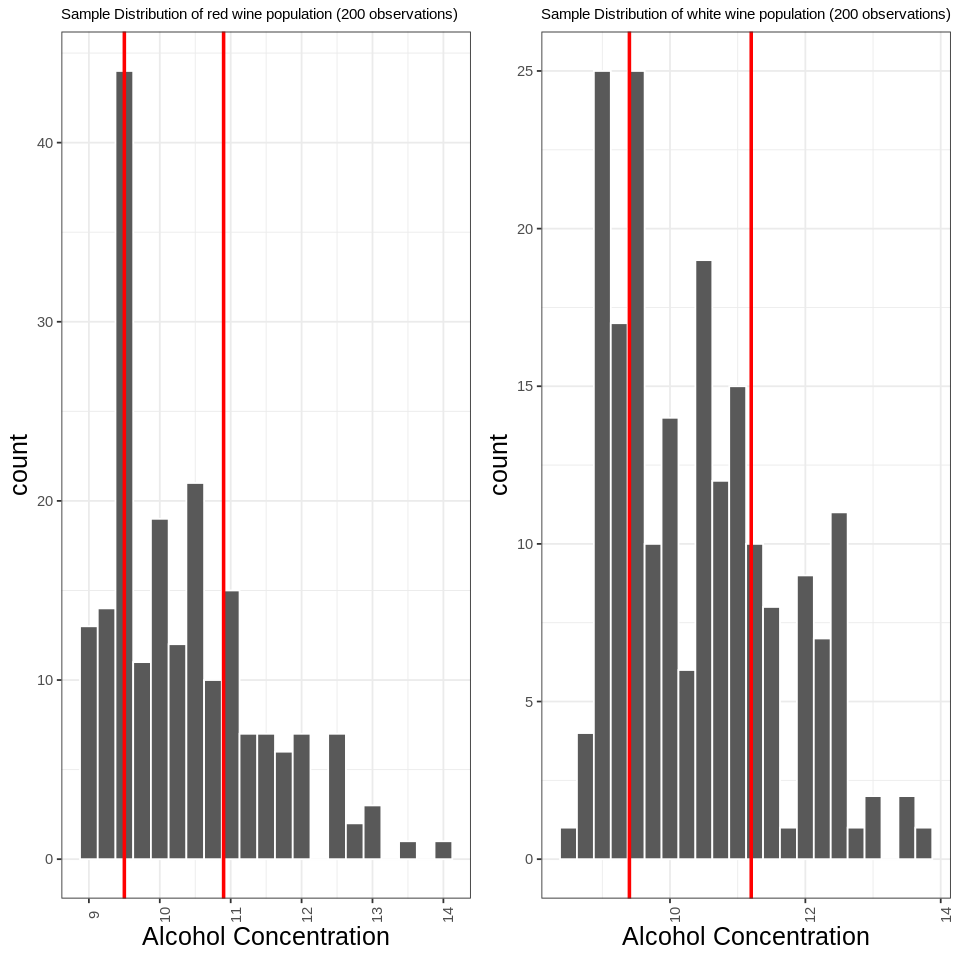

In [121]:
options(repr.plot.width = 8, repr.plot.height = 8)
## Plot the distribution of the sample with quantiles 
quantile_plot_red <- 
    sample_red %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile, colour = "red", size = 1) +
    labs(title = "Sample Distribution of red wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(plot.title = element_text(size = 9)) +
    theme(axis.title = element_text(size = 15))

quantile_plot_white <- 
    sample_white %>% 
    ggplot(aes(x = alcohol)) +
    theme_bw() +
    geom_histogram(binwidth = 0.25, color = 'white') +
    geom_vline(xintercept = lower_quantile_white, colour = "red", size = 1) +
    geom_vline(xintercept = upper_quantile_white, colour = "red", size = 1) +
    labs(title = "Sample Distribution of white wine population (200 observations)",
         x = "Alcohol Concentration") +
    theme(plot.title = element_text(size = 9)) +
    theme(axis.title = element_text(size = 15))



plots_row <- plot_grid(quantile_plot_red + 
                           theme(axis.text.x = element_text(angle = 90)),

                           quantile_plot_white +  
                           theme(axis.text.x = element_text(angle = 90)), 
                           ncol = 2)

dist_grid <- plot_grid(plots_row, 
                        rel_heights = c(0.5, 1), rel_widths = c(2, 1))
cat("Figure 1: Sample Distributions of Red and White Wine Populations")
dist_grid


Figure 2: Boxplot of Sample Distribution Quantiles

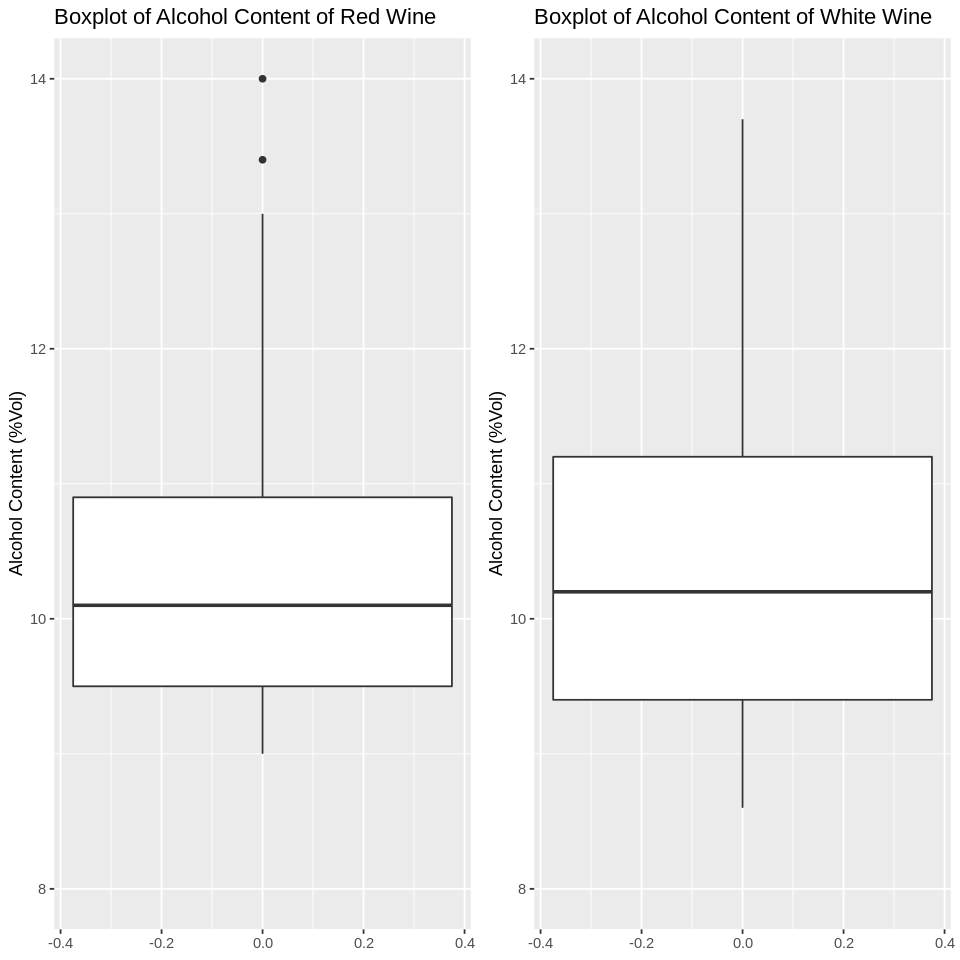

In [122]:
## Plot the distribution of the sample with boxplots  

quantile_box_plot_red <- ggplot(sample_red, aes(x = alcohol)) + 
    geom_boxplot() + xlim(8, 14) + coord_flip() + 
    xlab("Alcohol Content (%Vol)") + ggtitle("Boxplot of Alcohol Content of Red Wine")

quantile_box_plot_white <- ggplot(sample_white, aes(x = alcohol)) + 
    geom_boxplot() + xlim(8, 14) + coord_flip() +
    xlab("Alcohol Content (%Vol)") + ggtitle("Boxplot of Alcohol Content of White Wine")

cat("Figure 2: Boxplot of Sample Distribution Quantiles")
grid.arrange(quantile_box_plot_red, quantile_box_plot_white, ncol=2)

After examining the histograms and boxplots above, the previous statement of the means being different can be refuted, as it seems there is a usual number of values around point 9.5. It appears that the sample taken from the red wine population is slightly right-skewed, which explains the larger IQR. Therefore, an estimate is formed that the variance of alcohol in red wine and alcohol in white wine are approximately similar. A hypothesis test will be conducted to test this observation to see if the difference in means of the alcohol contents is significant, with a 5% significance level.


### Methods: Plan
This dataset is trustworthy since it comes from a reliable source from a database recommended on the course page. Moreover, an academic paper (Cortez et. al, 2009) was written on this data, further suggesting that it is a reliable source of data. To summarize the preliminary findings, the observed mean alcohol content for red and white wines was estimated using sampling. Furthermore, the IQR of the alcohol content of both types of wine was analyzed to compare the differences in alcohol content. This illustrated that the alcohol contents of both wines were reasonably similar. However, to test the significance of this difference, a hypothesis test will be conducted on these variables.
 
A hypothesis test will be conducted using the infer package wherein the null hypothesis states that there is no significant difference between the average alcohol amount in red wine and the average alcohol amount in white wine. Additionally, a 95% confidence interval for the difference in means will be determined to support the analysis further.


## Results
### Hypothesis Test
H<sub>0</sub> : There is no significant difference between average alcohol amount in red wine and average alcohol amount in white wine (Alcohol Content of Red Wine - Alcohol Content of White Wine)

H<sub>A</sub> : There is significant difference between average alcohol amount in red wine and average alcohol amount in white wine (Alcohol Content of Red Wine - Alcohol Content of White Wine)

In [61]:
# Selecting the columns of interest from the combined dataset(alcohol and type) and 
# filtering out the na values from the alcohol column

alcohol_data <-
combined_data %>% 
select(alcohol, type) %>% 
filter(!is.na(alcohol))
cat("Table 2: Filtered Combined Data Containing Alcohol and Type of Wine")
head(alcohol_data)

Table 2: Filtered Combined Data Containing Alcohol and Type of Wine

,alcohol,type
,<dbl>,<chr>
1,9.4,red
2,9.8,red
3,9.8,red
4,9.8,red
5,9.4,red
6,9.4,red


In [63]:
# Counting the amount of each type of wine(red and white)
wines_count <-
    alcohol_data %>% 
    count(type)
cat("Table 3: Number of Data Points for Red and White Wine")
wines_count

Table 3: Number of Data Points for Red and White Wine

type,n
<chr>,<int>
red,1599
white,4898


In [66]:
# Calculating the observed test statistic using the infer package
obs_diff_in_means <- 
    alcohol_data  %>% 
    specify(formula = alcohol ~ type) %>%
    calculate(stat = "diff in means", order = c("red", "white")) %>% 
    pull(stat)
cat("Test Statistic:")
obs_diff_in_means

Test Statistic:

[1] -0.09128393

In [68]:
set.seed(1234)

# Generating 1000 samples from the null distribution
null_diff_in_means <- 
    alcohol_data %>% 
    specify(formula = alcohol ~ type) %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute")  %>%
    calculate(stat = "diff in means", order = c("red", "white"))

Figure 3: Null Distribution and Test Statistic

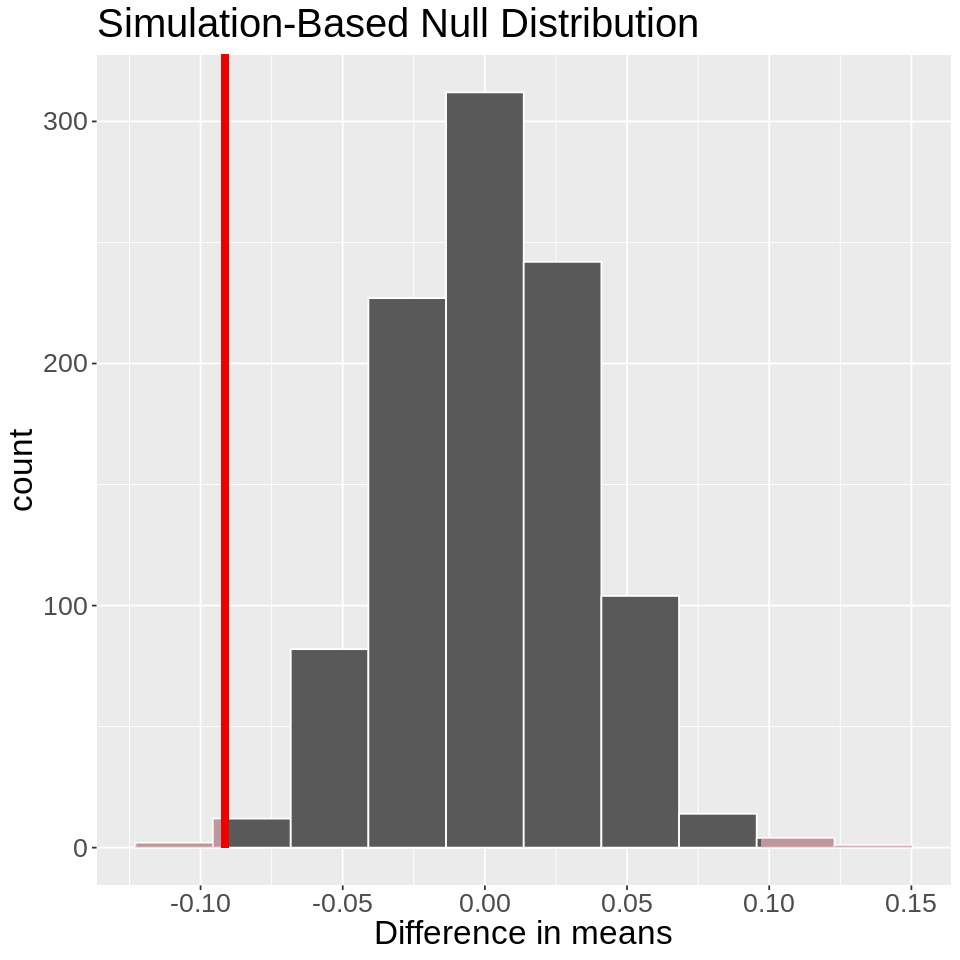

In [69]:
options(repr.plot.width = 8, repr.plot.height = 8)

# Plot results of hypothesis test and observe the test-statistic using the vertical bar 
diff_in_means_plot <-
    visualize(null_diff_in_means, bins = 10) + 
    shade_p_value(obs_stat = obs_diff_in_means, direction = "both") +
    xlab("Difference in means") +
    theme(text = element_text(size = 20))
cat("Figure 3: Null Distribution and Test Statistic")
diff_in_means_plot

The above distribution shows the null distribution of the difference in means and where the test statistic lies. This distribution supports the analysis since there is hardly any shaded region, suggesting that the likelihood of the null hypothesis being true is quite small. If the null hypothesis was true, the shaded area would be much larger. 

In [71]:
# Finding the p-value using the infer package
p_value <-
    null_diff_in_means %>% 
    get_p_value(obs_stat =  obs_diff_in_means, direction = "both") %>% 
    pull(p_value)

cat("p Value:")
p_value

p Value:

[1] 0.006

The obtained p-value is 0.006. At 5% significance level (0.05), the null hypothesis is rejected since the observed p-value is less than the significance level. Based on the hypothesis test, there is a 95% confidence that the alcohol content of red wine is not equal to the alcohol content of white wine. The hypothesis test supports previous findings that estimates that white wine would have a higher mean alcohol content of 10.429(vol.%) as compared to red wine that has a mean alcohol content of 10.277(vol.%). 

### 95% Confidence Interval for Difference in Means Using Bootstrapping

Next, the 95% confidence interval for the difference in means is constructed to examine whether the observed value of difference in means (-0.0912) lies within the bounds of the interval. 

In [73]:
# Finding bootstrap distribution for the difference in means using the infer package 

diff_in_means_bootstrap_dist <- 
    alcohol_data %>%
    specify(formula = alcohol ~ type) %>%
    generate(reps = 1000, type = "bootstrap") %>%
    calculate(stat = "diff in means", order = c("red", "white"))  

In [84]:
# Finding the 95% confidence interval of the bootstrap distribution for the difference in means using the infer package
diff_in_means_ci <- 
    diff_in_means_bootstrap_dist %>% 
    get_confidence_interval(level = 0.95, type = "percentile")
cat("95% Confidence Interval From Bootstrapping:")
diff_in_means_ci

95% Confidence Interval From Bootstrapping:

lower_ci,upper_ci
<dbl>,<dbl>
-0.1520232,-0.0249639


<b>Lower Bound : -0.1514</b>

<b>Upper Bound : -0.0291</b>

Figure 4: Bootstrap Distribution with 95% Confidence Interval

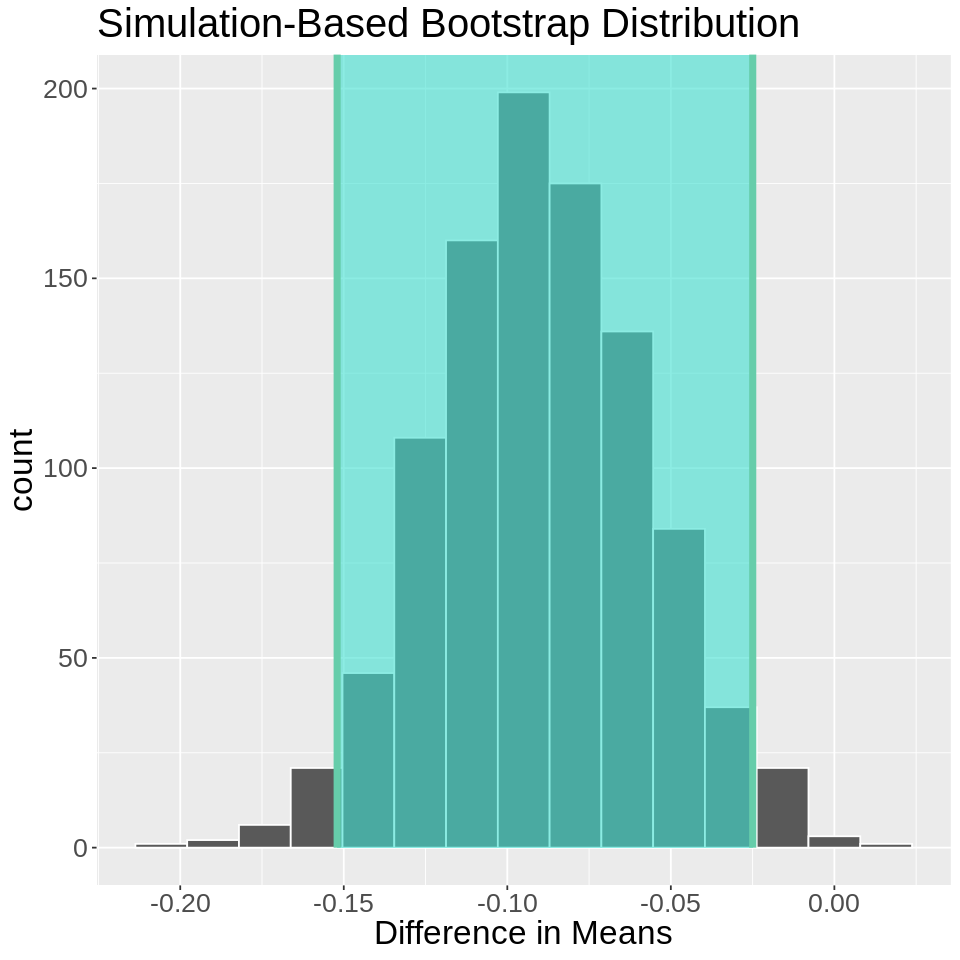

In [87]:
options(repr.plot.width = 8, repr.plot.height = 8)
# Plotting the difference in means

diff_in_means_ci_plot <-
    visualize(diff_in_means_bootstrap_dist) + 
    shade_confidence_interval(endpoints = diff_in_means_ci) + 
    theme(text = element_text(size = 20)) + 
    xlab("Difference in Means")
cat("Figure 4: Bootstrap Distribution with 95% Confidence Interval")
diff_in_means_ci_plot

From the distribution, it can be concluded that observed value of difference in means i.e -0.09128 is contained inside the confidence interval. This means that if repeated samples are taken, there is a 95% confidence that the observed value would lie inside the confidence interval.

### 95% Confidence Interval for Difference in Means Using Asymptotics

<b>95% Confidence Interval for Difference in Means Using Central Limit Theorem

Next, the difference of means of the two wines are analyzed using asymptotics under assumption of normality.

In [106]:
# Taking a sample of 650 from the dataset for each type of wine (red and white)
set.seed(1234)

alcohol_sample <- 
    alcohol_data %>% 
    group_by(type) %>% 
    sample_n(size = case_when(type == "red" ~ 650,
                              type == "white" ~ 650), replace = FALSE) %>% 
    ungroup()

Figure 5: Sample Distribution of Alcohol Content of Red and White Wines

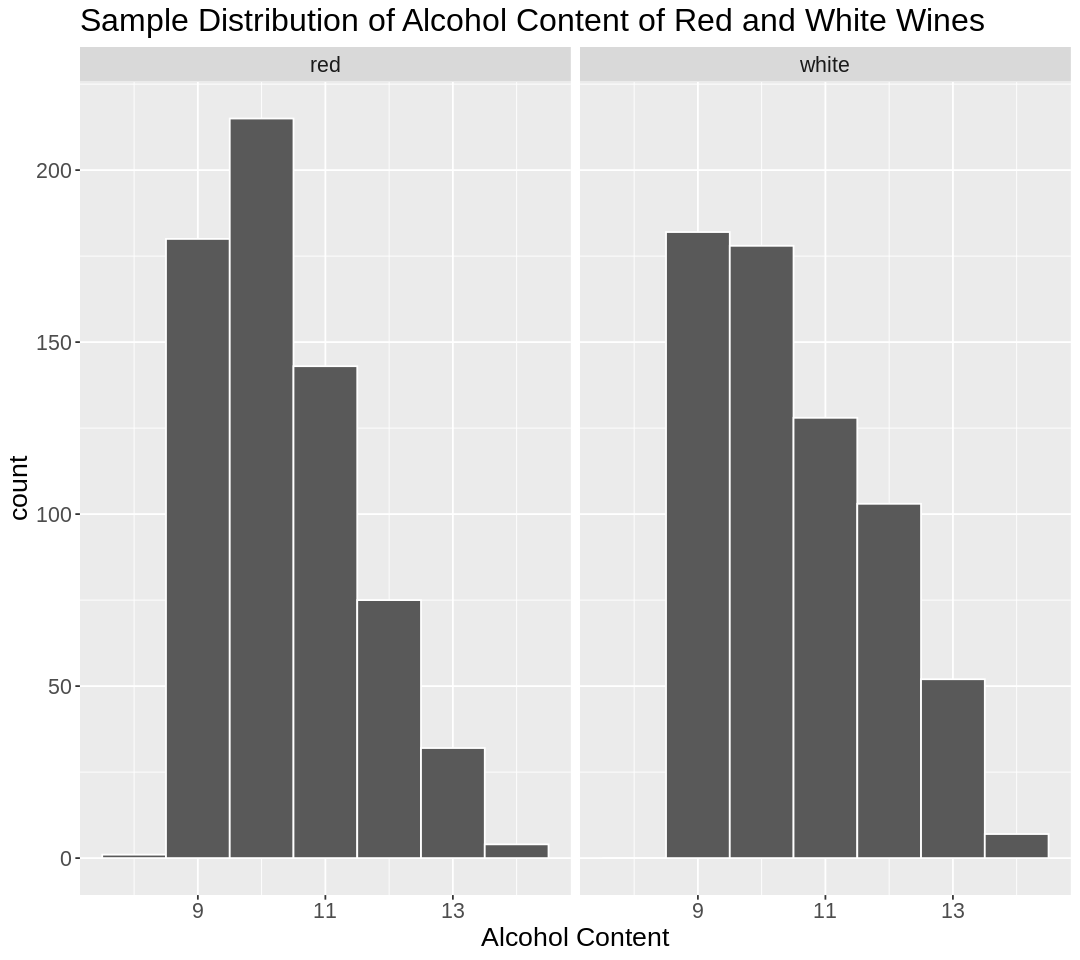

In [107]:
# Observe the sample distribution of each type of wine

options(repr.plot.width = 9, repr.plot.height = 8)

alocohol_samp_dist_plot <- 
    alcohol_sample %>% 
    ggplot() + 
    geom_histogram(aes(alcohol), binwidth = 1, color = 'white') +
    facet_wrap(~ type) + 
    theme(text = element_text(size = 16)) +
    ggtitle("Sample Distribution of Alcohol Content of Red and White Wines") + 
    xlab("Alcohol Content")

cat("Figure 5: Sample Distribution of Alcohol Content of Red and White Wines")
alocohol_samp_dist_plot



In [108]:
# Obtain the sample means and standard error alcohol content for each type of wine.

alcohol_summary <- 
    alcohol_sample %>% 
    group_by(type) %>% 
    summarise(sample_mean = mean(alcohol),
              sample_std_error = sd(alcohol)/sqrt(n())) 

cat("Table 4: Sample Means and Standard Errors")
alcohol_summary

Table 4: Sample Means and Standard Errors

type,sample_mean,sample_std_error
<chr>,<dbl>,<dbl>
red,10.44428,0.04289367
white,10.59132,0.05071732


In [109]:
# Obtain a 95% confidence interval for the difference between the means using the Central Limit Theorem(CLT). 

red_mean <- alcohol_summary$sample_mean[1]
red_var <- alcohol_summary$sample_std_error[1]^2
white_mean <- alcohol_summary$sample_mean[2]
white_var <- alcohol_summary$sample_std_error[2]^2

alcohol_clt_ci <- 
    tibble(lower_ci = (red_mean - white_mean - qnorm(0.975) * sqrt(white_var + red_var)),
           upper_ci = (red_mean - white_mean + qnorm(0.975) * sqrt(white_var + red_var)))

cat("95% Confidence Interval From Central Limit Theorem:")
alcohol_clt_ci

95% Confidence Interval From Central Limit Theorem:

lower_ci,upper_ci
<dbl>,<dbl>
-0.2772292,-0.01685289


<b>Lower Bound : -0.2772</b>

<b>Upper Bound : -0.0169</b>

Under the assumption of normality the confidence interval for the difference of means in alcohol content is [-0.2753049, 0.01314486]. Next, the accuracy of this interval is tested below.

In [110]:
# Testing accuracy of the confidence interval

set.seed(1234)

# Obtain the means
true_means <-
    alcohol_data %>% 
    group_by(type) %>% 
    summarise(sample_mean = mean(alcohol)) %>% 
    pull(sample_mean)

# Obtain the true difference in mean
true_diff = true_means[1] - true_means[2]

alcohol_multiple_samples <- 
    tibble(replicate = 1:100) %>% 
    mutate(sample = map(replicate,
                        `.f` = ~
                            alcohol_data %>% 
                            group_by(type) %>% 
                            sample_n(size = case_when(type == "red" ~ 500,
                                                      type == "white" ~ 500), replace = FALSE) %>% 
                            ungroup() 
                    )
    ) %>% 
    unnest(sample) %>% 
    group_by(replicate, type) %>% 
    summarise(sample_mean = mean(alcohol),
              sample_std_error = sd(alcohol)/sqrt(n()),
              n = n()) %>% 
    pivot_wider(names_from = type, values_from = c(sample_mean, sample_std_error, n))


`summarise()` has grouped output by 'replicate'. You can override using the `.groups` argument.



In [111]:
# Obtaining multiple confidence intervals from different samples.
alcohol_multiple_ci <-
    alcohol_multiple_samples %>% 
    mutate(lower_ci = sample_mean_red - sample_mean_white - qnorm(0.975) * sqrt(sample_std_error_red^2+sample_std_error_white^2),
           upper_ci = sample_mean_red - sample_mean_white + qnorm(0.975) * sqrt(sample_std_error_red^2+sample_std_error_white^2)) %>% 
    select(replicate, lower_ci, upper_ci) %>% 
    mutate(captured = between(true_diff, lower_ci, upper_ci))


Figure 6: 100 95% Confidence Intervals

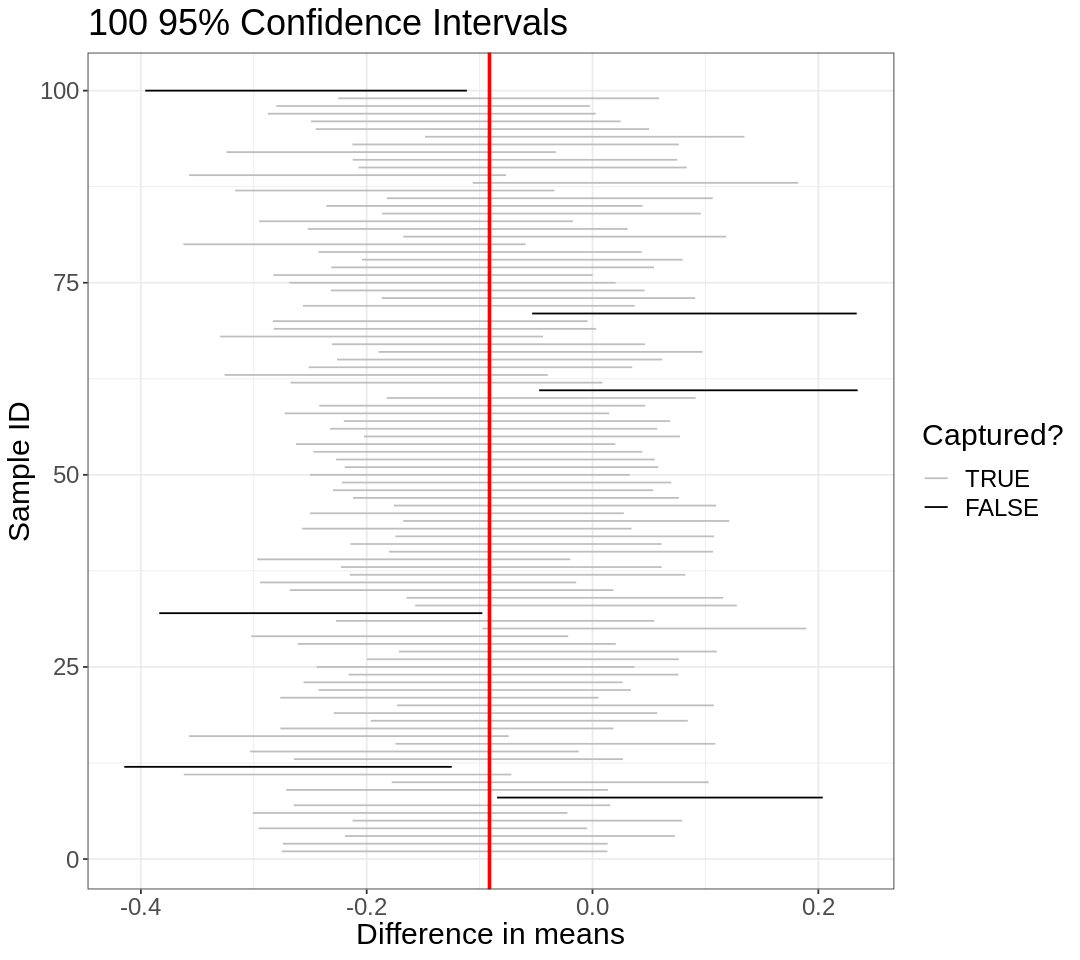

In [112]:
# Plotting multiple confidence intervals and observing if they capture the true difference in means

alcohol_multiple_ci %>% 
    ggplot() +
    scale_colour_manual(breaks = c("TRUE", "FALSE"), 
                        values = c("grey", "black")) +
    geom_segment(aes(x = lower_ci,
                     xend = upper_ci,
                     y = replicate,
                     yend = replicate,
                     colour = captured)) +
    geom_vline(xintercept = true_diff, colour = "red", size = 1) +
    labs(title = "100 95% Confidence Intervals",
         x = 'Difference in means',
         y = "Sample ID",
         colour = "Captured?") +
    theme_bw() + 
    theme(text = element_text(size = 18))

cat("Figure 6: 100 95% Confidence Intervals")



The plot above shows that even though the population is not Normal, the CLT approximation is fairly accurate.

<b>95% Confidence Interval for Difference in Means Using t Distribution

Next, the confidence interval for the difference of means of the two wines are analyzed using asymptotics and the t-distribution.

In [125]:
# Using t.test and tidy to obtain confidence interval using t-distribution
t_test <- tidy(t.test(wine_quality_red$alcohol, wine_quality_white$alcohol))
cat("Table 5: Result of t.test")
t_test

t_ci <- t_test %>% 
select(conf.low, conf.high)

cat("95% Confidence Interval From t-distribution:")
t_ci

Table 5: Result of t.test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
-0.09128393,10.42298,10.51427,-2.859029,0.00427778,3100.475,-0.1538867,-0.02868117,Welch Two Sample t-test,two.sided


95% Confidence Interval From t-distribution:

conf.low,conf.high
<dbl>,<dbl>
-0.1538867,-0.02868117


<b>Lower Bound : -0.1539</b>

<b>Upper Bound : -0.0287</b>

### Overview of 95% Confidence Intervals for Difference in Means

Confidence interval using Bootstrapping: <b>[-0.1514, -0.0291]
    
Confidence interval using CLT: <b>[-0.2772, -0.0169]

Confidence interval using t.test: <b>[-0.1539, -0.0287]

# Discussion
## Findings
#### Hypothesis Test
From the hypothesis test conducted in the report, a p-value of 0.06 is obtained. Using a 5% significance level, this p-value leads to a rejection of the null hypothesis. This suggests that with 95% certainty, the mean alcohol content of red and white wines is significantly different. This conclusion supports the estimates made in the preliminary results that white wine had a slightly higher mean alcohol content than red wine.

#### Comparing Bootstrapping and Asymptotics Methods
Overall, the confidence intervals obtained by all three methods (bootstrapping, CLT, t-distribution), were relatively similar. Each of the intervals did not contain the value 0, hence, supporting the results of the hypothesis test that the means alcohol content in red and white wines are not equal. Furthermore, the negative signs for the confidence intervals support our preliminary results that suggested that white wines had a higher alcohol concentration than red wines. 

Furthermore, the confidence intervals obtained by bootstrapping [-0.1514, -0.0291] and the t-distribution were extremely similar [-0.1539, -0.0287]. Although the interval obtained through the CLT [-0.2772, -0.0169] was fairly close, the interval is wider than the others and relatively different than the bootstrapping and t-distribution intervals. Hence, the interval obtained by the CLT and the assumption of normality is likely the least reliable of the 95% confidence intervals. This may be because the t-distribution accounts for additional uncertainty that the normal distribution does not account for due to its heavier tails. Hence, the t-distribution is able to give a more precise estimation.

## What impact could such findings have?
These findings could provide insights for wine making companies as well as consumers regarding what the alcohol content in wines are...

## What future questions could this lead to?
The study can be further analyzed by possibly exploring the relation between alcohol content and the other variables in the dataset. We could see if any of the other variables are correlated with the alcohol concentration to help make a regression model in future.

# References
Zhang, Qing-An, et al. “Preliminary Study of the Effect of Ultrasound on Physicochemical Properties of Red Wine.” CyTA - Journal of Food, vol. 14, no. 1, 2015, pp. 55–64., https://doi.org/10.1080/19476337.2015.1045036.

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.